<a href="https://colab.research.google.com/github/Vanishivani1614/BharatIntern-Task-Irisflower-classification-ML/blob/main/Iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [75]:
df = pd.read_csv('/content/drive/MyDrive/Data Set/Iris.csv')

In [76]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [77]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [78]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
df.shape

(150, 6)

In [80]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [82]:
data=df.groupby('Species')

In [83]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [84]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


 visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14707871c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14707875e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1470784bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470787b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470787dc0>],
 'means': []}

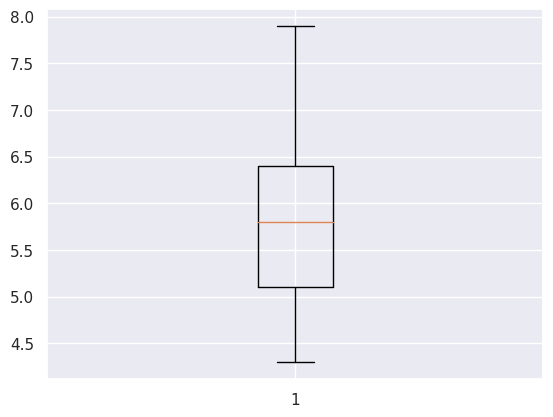

In [86]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f142445f040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f142445f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f142445eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f142445f9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f142445fc40>],
 'means': []}

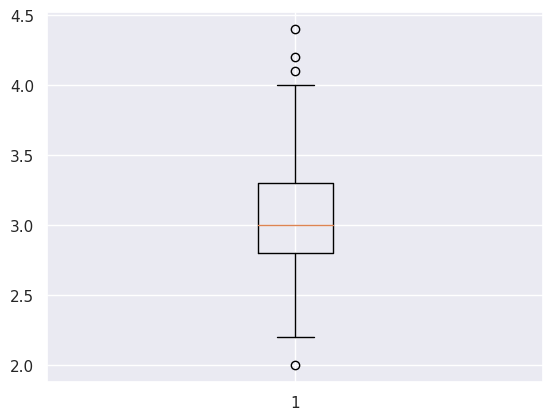

In [87]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14242dda20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14242ddf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14242dd780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14242de4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14242de740>],
 'means': []}

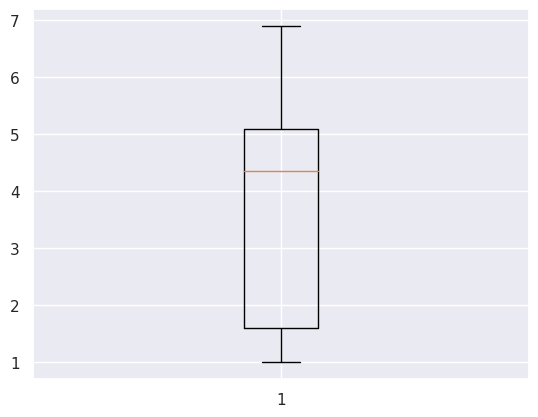

In [88]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1424360970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1424360eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14243606d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14243613f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1424361690>],
 'means': []}

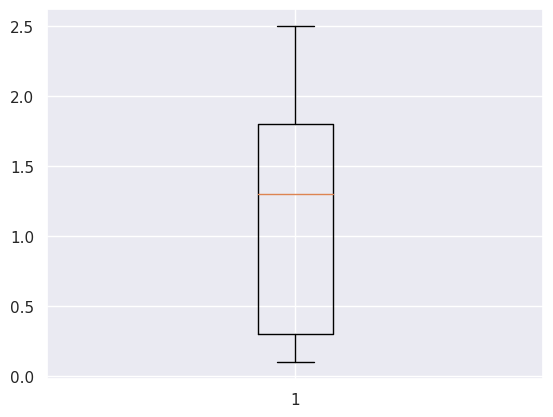

In [89]:
plt.boxplot(df['PetalWidthCm'])

<ipython-input-90-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

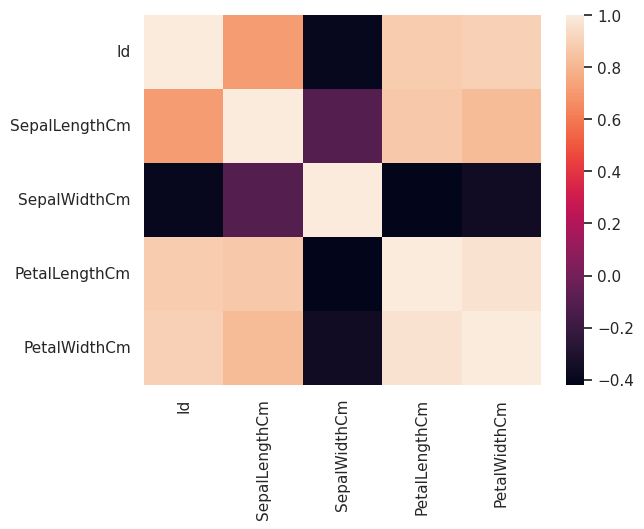

In [90]:
sns.heatmap(df.corr())

Data Preparation

In [92]:
df.drop('Id',axis=1,inplace=True)

In [93]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [94]:
df.Species=[sp[i] for i in df.Species]

In [95]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [96]:
X=df.iloc[:,0:4]

In [97]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [98]:
y=df.iloc[:,4]

In [99]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

Traning Model

In [104]:
model=LinearRegression()

In [105]:
model.fit(X,y)

LinearRegression()

In [106]:
model.score(X,y) #coef of prediction

0.9304223675331595

In [107]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [108]:
model.intercept_

1.192083994828139

Making Predictions

In [109]:
y_pred=model.predict(X_test)

Model Evolution

In [110]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
